# 1. Project Objective and Research Questions

## 1.1 Objective

Based on the dataset, we seek to investigate the relationship between 4 different factors and life expectancy at birth. The 4 factors are mainly are: "Basic drinking water resources", "Body Mass Index" , "Vaccination" and "Alocohol Consumption". This report will cover the data descriptions and analysis using R language. For each of our research objectives, we performed statistical analysis and drew conclusions in the most appropriate approach, together with explanations and elaborations.

## 1.2 Research question:

What are the effects of the 4 factors on the life expectancy of a person using the dataset given. We eould also investigate any correlations between said factors to see if one contributes to the other which would add value to the our investiagtion. Information gained here could be act on in further experiments.The results found here would be showed using vizualization tools for better understanding.


# 2. Data Description

## 2.1 Credibility

The dataset was retrieved from The Global Health Observatory (GHO) data repository under World Health Organization (WHO). It records the life expectancy and the relevant health factors from over 180 countries in the WHO data repository website.

Since where the data was retrieved from is from a reputable and unbiased organisation. We can claim to a large extent that the data found and utilised in this study is factual, credible and usable for this data analysis report.

## 2.2 Data Cleaning 

Before we began processing the data, we conducted a thorough cleaning of the data so that it could be used. What we decided for the cleaning process were as follows:
- We removed columns of data that were irrelevant to our aim and purpose of the analysis.   E.g. une_life, une_edu, etc.
- Removing columns with data that had missing values. No explanation was given and thus we deduced that it would provide inconsistent results.
- We also were given results from a span of 10 years per country and thus averaged it out for each country for a more accurate dataset

## 2.3 Definitions

The cleaned data is presented as a table and posted into this repository.


In [138]:
library(dplyr)
#install.packages("moments")
library(moments)
#install.packages("openxlsx")
library(openxlsx)

In [140]:
who <- read.csv('lifecleaned.csv')
head(who)

country,region,life_expect,life_exp60,adult_mortality,infant_mort,age1.4mort,alcohol,bmi,measles,polio,basic_water,gghe.d,une_pop,une_infant,une_life,une_hiv,une_gni,country_code
Afghanistan,Eastern Mediterranean,62.17648,16.10747,244.1551,0.063651875,0.0057950000,0.009685,22.98750,61.12500,66.50000,54.93484,0.4774087,31787.016,58.650000,62.21875,0.1000000,1763.7500,AFG
Angola,Africa,55.75137,16.23100,297.2910,0.093788235,0.0154382353,4.726095,22.56471,48.64706,36.47059,48.55909,1.5998647,22047.548,87.082353,53.24082,1.5647059,4911.1765,AGO
Argentina,Americas,75.46045,20.94105,123.8147,0.013747647,0.0004200000,7.959286,26.90000,94.35294,91.94118,97.92712,5.0519788,40130.997,13.588235,74.93229,0.3647059,15750.5882,ARG
Armenia,Europe,73.20999,18.93514,134.3317,0.019022647,0.0006194118,3.740332,25.96471,94.64706,94.29412,97.61200,1.4712124,2950.035,18.805882,73.09188,0.1647059,6214.1176,ARM
Australia,Western Pacific,81.54399,24.49255,65.5709,0.004351176,0.0002132353,10.124706,26.77059,93.82353,91.94118,99.84093,5.7133659,21437.576,4.235294,81.21076,0.1000000,36175.8824,AUS
Burundi,Africa,56.00316,16.15959,334.9878,0.074726176,0.0111088235,5.117331,21.17647,86.58824,87.05882,55.36562,2.0823500,8230.628,67.947059,55.40812,1.9529412,675.8824,BDI


# 3 Data Cleaning and Summary Statistics Of Variables

In this section, we shall look into the data in more detail. Each variable is investigated individually to look for possible outliers, and/or to perform a transformation to avoid highly skewed data

## 3.1  Variables of Interest

In [32]:
library(repr)

### 3.1.1 Life expectancy at Birth, "life-expect"

- Data initially left skewed.
- Square root transformation done.
- Data looks more normal now.
- Skewness changes from  -0.3786545 to -0.1235241.
- No outliers were observed.


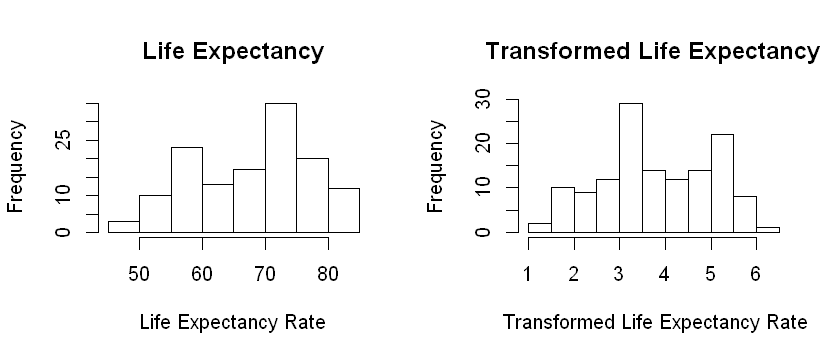

In [77]:
par(mfrow = c(1, 2))
options(repr.plt.width = 4, repr.plot.height = 3)

# Data prep:
#Life expectancy
hist(nwho$life_expect, main= "Life Expectancy", xlab="Life Expectancy Rate")
#print(paste("The Original Skewness is :", skewness(nwho$life_expect, na.rm = TRUE)))

# Transformation done here
life <- sqrt(max(nwho$life_expect+1) - nwho$life_expect)
hist(life,main= "Transformed Life Expectancy", xlab=" Transformed Life Expectancy Rate")

#print(paste("The Transformed Skewness is :", skewness(life)))

### 3.1.2 Average Measles Vaccination, "measles"

- Data initially left skewed.
- Log based transformation done.
- After transformation data looks more normal.
- Skewness changes from -1.324084 to -0.03333543.
- No outliers were observed.

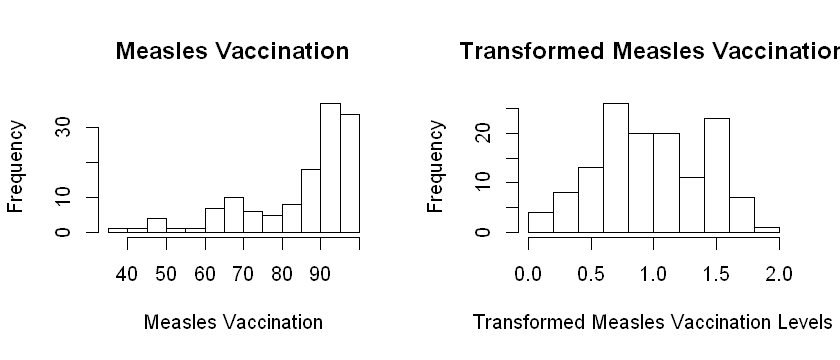

In [78]:
par(mfrow = c(1, 2))
options(repr.plt.width = 4, repr.plot.height = 3)

# Measles vaccination
hist(nwho$measles, main= "Measles Vaccination", xlab="Measles Vaccination")
#print(paste("The Original Skewness is :", skewness(nwho$measles)))

#Transformation done here:

measles <- log10(max(nwho$measles+1)-nwho$measles)
hist(measles, main = "Transformed Measles Vaccination",xlab = "Transformed Measles Vaccination Levels")
#print(paste("The Transformed Skewness is :", skewness(measles)))


### 3.1.3 Average Polio Vaccinations, "polio"

- Data initially left skewed.
- Log based transformation done.
- After transformation data looks more normal.
- Skewness changes from -1.542721 to 0.02584688.
- No outliers were observed.

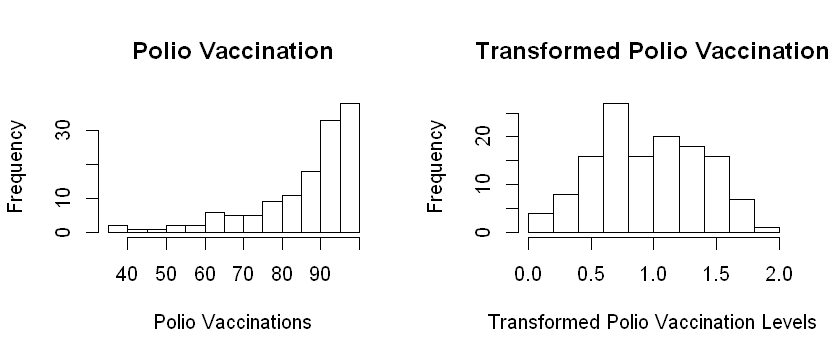

In [76]:
par(mfrow = c(1, 2))
options(repr.plt.width = 4, repr.plot.height = 3)

#Polio vaccination
hist(nwho$polio, main= "Polio Vaccination", xlab="Polio Vaccinations")
#print(paste("The Original Skewness is :", skewness(nwho$polio)))

# Transformation done here:
polio <- log10(max(nwho$polio+1)-nwho$polio) 
hist(polio, main = "Transformed Polio Vaccination",xlab = "Transformed Polio Vaccination Levels")
#print(paste("The Transformed Skewness is :", skewness(polio)))

### 3.1.4 BMI, "bmi"

- Data looks relatively normal. 
- No transformation was necessary.
- Skewness: -0.246685.
- No outliers were observed


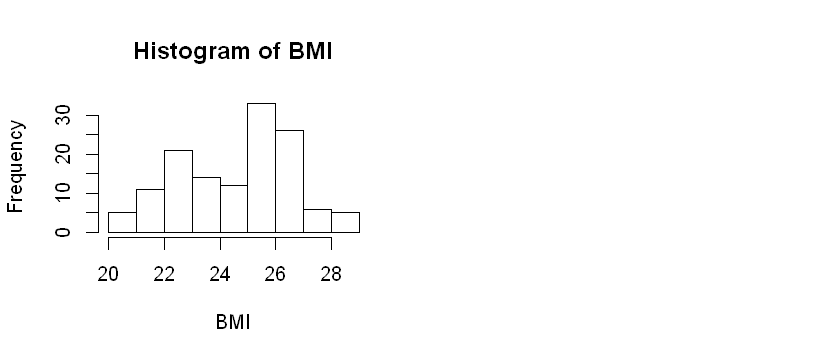

In [83]:
par(mfrow = c(1, 2))
options(repr.plt.width = 4, repr.plot.height = 3)

hist(who$bmi, main= "Histogram of BMI", xlab="BMI")
#skewness(who$bmi)
bmi <- who$bmi
# Transformation was not needed


### 3.1.5 Alcohol consumption, "alcohol"

- Data was initially right skewed
- Square root transformation was applied.
- After transformation, skewness changes from 0.5596672 to -0.1759885.
- No outliers observed.

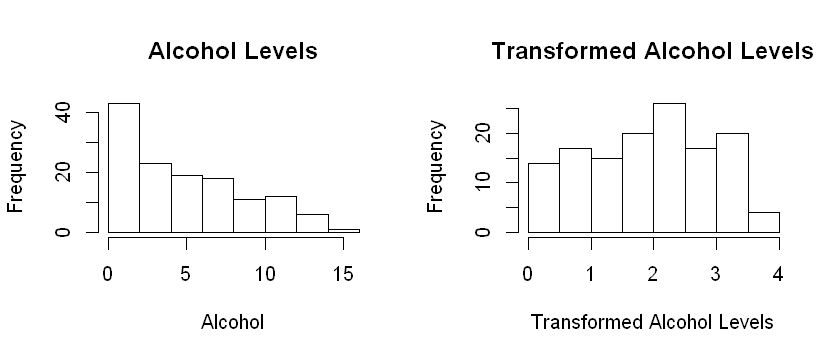

In [146]:
par(mfrow = c(1, 2))
options(repr.plt.width = 4, repr.plot.height = 3)

# Alcohol
hist(who$alcohol, main= "Alcohol Levels", xlab="Alcohol")
#skewness(who$alcohol)
# Transformation done here:
ALC <- sqrt(who$alcohol)
#skewness(ALC)
hist(ALC, main = "Transformed Alcohol Levels",xlab = "Transformed Alcohol Levels")

### 3.1.6 Basic water, "basic_water"

- Data initially left skewed.
- Log based transformation done.
- After transformation data looks more normal.
- Skewness changes from -0.8356876 to -0.3280039.
- No outliers were observed.


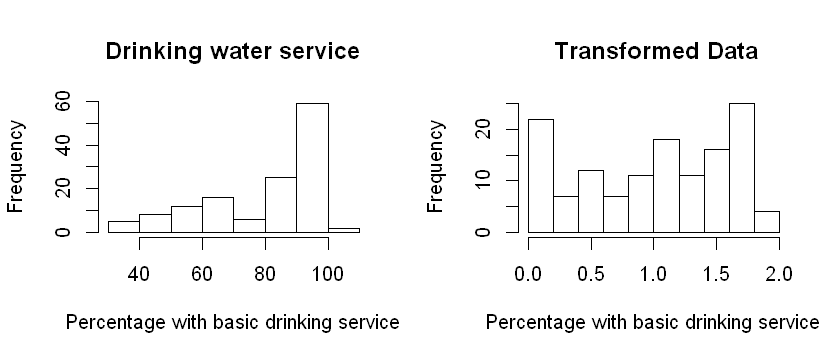

In [93]:
par(mfrow = c(1, 2))
options(repr.plt.width = 4, repr.plot.height = 3)

# Basic water 
hist(who$basic_water, main= "Drinking water service", xlab="Percentage with basic drinking service")
#skewness(who$basic_water)
# Transformation done here:
water <- log10(max(who$basic_water+1)-who$basic_water) 
hist(water, main= " Transformed Data", xlab="Percentage with basic drinking service")
#skewness(water)


 ## 3.3 Final datset for analysis

The dataset is further reduced to 133 observations  and 10 variables with the suggested transformations. Namely, log-transformation for basic-water, measles and polio, square root transformation for life-expect and alcohol. We will only be looking into the relationship of life expectancy with alcohol consumption, BMI, accessibility to basic drinking water services and vaccinations (Measles and Polio).

# 4 Statistical Analysis

## 4.1 Correlations between life expectancy and other variables

In [133]:
#install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

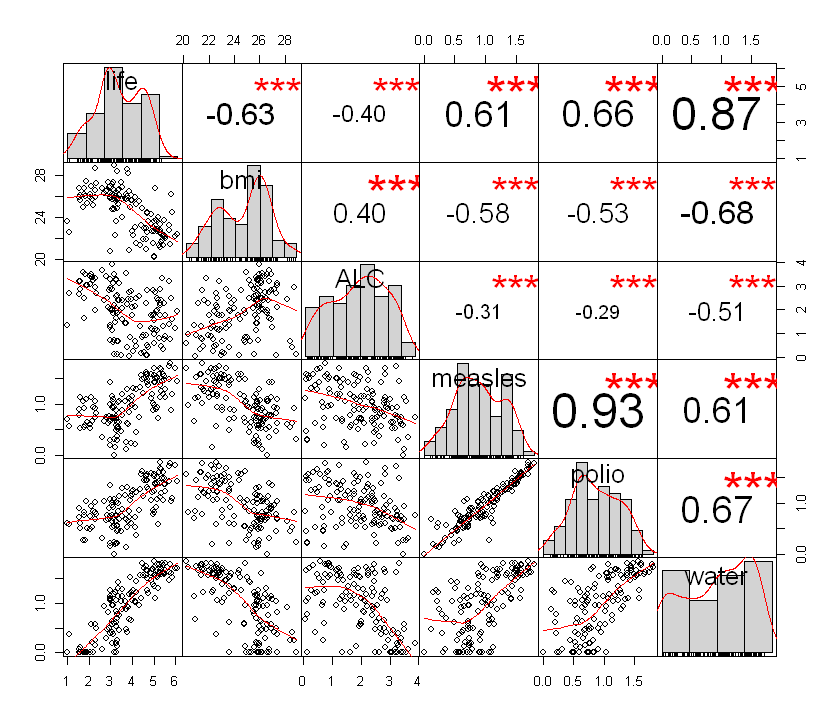

In [125]:
# Correlation matrix for needed variables
par(mfrow = c(1, 4))
options(repr.plt.width = 4, repr.plot.height = 6)

my_data <- cbind(life,bmi,ALC,measles,polio,water)
chart.Correlation(my_data, histogram=TRUE, pch=19)


From this correlation matrix we made the following findings:

- Life expectancy (life) and BMI (bmi) are negatively correlated (r = -0.63)
- Life expectancy (life) and alcohol consumption (ALC) are negatively correlated (r = -0.40)
- Life expectancy (life) and measles vaccination (meas) are positively correlated (r = 0.61)
- Life expectancy (life) and polio vaccination (pol) are positively correlated (r = 0.66)
- Life expectancy (life) and basic water services (water) was shown to be the most positively correlated (r = 0.87)

From the plots, it appears that the transformed water indicator is the most influential indicator for life expectancy at birth. To substantiate these preliminary findings we carried on to do statistical tests to follow suit.


## 4.2 Statistical tests

### 4.2.1 Relationship between life_expect and basic_water

In [106]:
library(ggplot2)


Call:
lm(formula = life ~ water)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58690 -0.41054  0.01741  0.42522  1.25119 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.02313    0.10189   19.86   <2e-16 ***
water        1.78793    0.08804   20.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6068 on 131 degrees of freedom
Multiple R-squared:  0.759,	Adjusted R-squared:  0.7571 
F-statistic: 412.5 on 1 and 131 DF,  p-value: < 2.2e-16


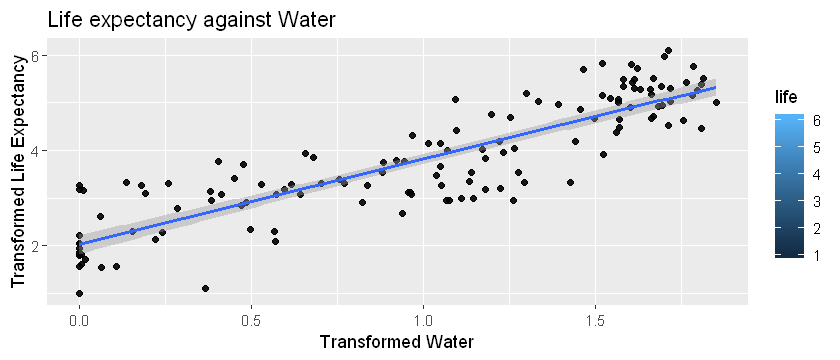

In [132]:
options(repr.plt.width = 4, repr.plot.height = 3)

# For basic water services
z <- lm(formula = life ~ water)
summary(z)

# Scatterplot for life expectancy at birth against water
ggplot(nwho,aes(water,life)) + geom_point(aes(fill=life),alpha=0.9) +
  xlab("Transformed Water") + ylab("Transformed Life Expectancy") + 
  ggtitle("Life expectancy against Water") + geom_smooth(method = 'lm')




For this section, we will determine if the life expectancy of people is influenced by the accessibility of basic drinking water services. To analyse their relationship, we perform a simple linear regression test between the transformed life expectancy and the transformed basic drinking water services. The fitted model is life_expect = 2.02313 + 1.78793* basic_water.

The regression model resulted in a p-value of less than 2e-16 which indicates a statistically significant relationship between the two variables. It also has a R-squared value of 0.759, implying that approximately 75.9% of the life expectancy is due to the access to basic drinking water services. However, R-squared cannot be used to justify the “goodness” of the linear regression model, so we will further look at its scatterplot. From the scatterplot, there is an upward trend, implying that as more people have access to basic drinking water services, the life expectancy becomes higher. This observation holds true as the lack of clean drinking water negatively affects life expectancy through the transmission of various diseases (Rahman et al, 2018) (Alemu, 2017) and diarrheal deaths (WHO, 2022).

### 4.2.2 Relationship between life_expect and bmi


Call:
lm(formula = life ~ bmi)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4738 -0.4645  0.0925  0.6767  2.5748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.09362    1.01465  12.905  < 2e-16 ***
bmi         -0.37693    0.04099  -9.196 7.48e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9635 on 131 degrees of freedom
Multiple R-squared:  0.3923,	Adjusted R-squared:  0.3876 
F-statistic: 84.56 on 1 and 131 DF,  p-value: 7.476e-16


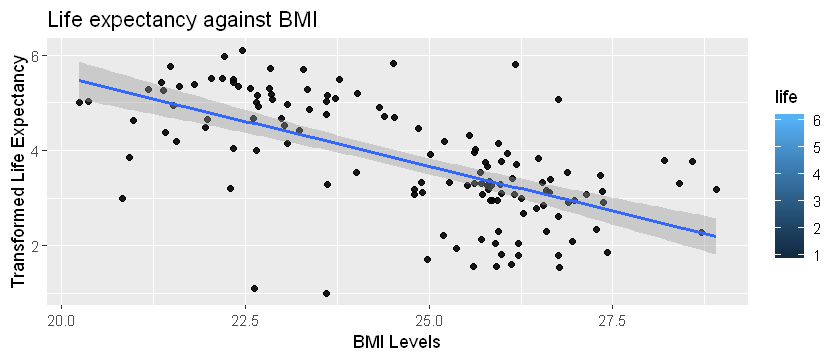

In [134]:
options(repr.plt.width = 4, repr.plot.height = 3)

# Scatterplot for life expectancy at birth against BMI
ggplot(nwho,aes(bmi,life)) + geom_point(aes(fill=life),alpha=0.9) +
  xlab("BMI Levels") + ylab("Transformed Life Expectancy") + 
  ggtitle("Life expectancy against BMI") + geom_smooth(method = 'lm')

# For BMI
w <- lm(formula = life ~ bmi)
summary(w)


For this section, we will determine if the life expectancy of people is influenced by the mean BMI of people by carrying out a simple linear regression test.

The regression model resulted in a p-value of 7.48e-16 which indicates a statistically
significant relationship between life expectancy at birth and BMI. The r-squared model is 0.3923, which tells us there is a correlation present but it might not be the most influential to the life expectancy of people at birth. From the scatterplot below, we observe a downward trend. A healthy BMI would be within 18.5 to 24.9 and research has shown that for every five-unit increase in BMI, the likelihood of death increases by 31%, which is accurately reflected in the scatterplot. This research included people with a BMI of 22.5 up to 49.9. (Worthing, 2020)


### 4.2.3 Relationship between life_expect and measles


Call:
lm(formula = life ~ measles)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49622 -0.54081  0.04873  0.60607  2.20078 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0520     0.2138   9.597  < 2e-16 ***
measles       1.7692     0.1993   8.878 4.48e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9766 on 131 degrees of freedom
Multiple R-squared:  0.3756,	Adjusted R-squared:  0.3709 
F-statistic: 78.81 on 1 and 131 DF,  p-value: 4.482e-15


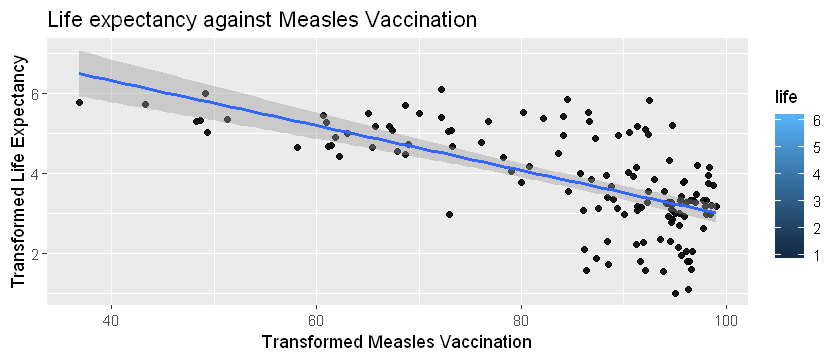

In [131]:
options(repr.plt.width = 4, repr.plot.height = 3)

# Scatterplot for life expectancy at birth against measles vaccination
ggplot(nwho,aes(measles,life)) + geom_point(aes(fill=life),alpha=0.9) +
  xlab("Transformed Measles Vaccination") + ylab("Transformed Life Expectancy") + 
  ggtitle("Life expectancy against Measles Vaccination") + geom_smooth(method = 'lm')

#For Basic Water
x <- lm(formula = life ~ measles) 
summary(x)


For the measles vaccination, we did a linear regression test shown below. That gives a p-value of  4.48e-15. This indicates that there is a statistically significant relationship between measles vaccination and life expectancy. The r-squared model is 0.3756, which tells us there is a correlation present but it might not be the most influential to the life expectancy of people at birth. From the scatterplot, there is an upward trend for the life expectancy at birth as the vaccinations increase. As more vaccinations are administered, the higher the life expectancy of these people become (Grauer, Lowen, Liebchen, 2020) .

### 4.2.3 Relationship between life_expect and polio


Call:
lm(formula = life ~ polio)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14535 -0.59419  0.04325  0.65585  2.12215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9604     0.1982   9.893   <2e-16 ***
polio         1.9213     0.1897  10.127   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9257 on 131 degrees of freedom
Multiple R-squared:  0.4391,	Adjusted R-squared:  0.4348 
F-statistic: 102.6 on 1 and 131 DF,  p-value: < 2.2e-16


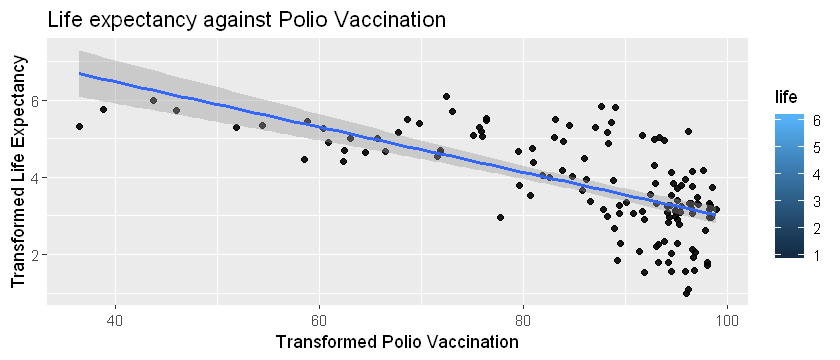

In [136]:
options(repr.plt.width = 4, repr.plot.height = 3)

# Scatterplot for life expectancy at birth against polio vaccination
ggplot(nwho,aes(polio,life)) + geom_point(aes(fill=life),alpha=0.9) +
  xlab("Transformed Polio Vaccination") + ylab("Transformed Life Expectancy") + 
  ggtitle("Life expectancy against Polio Vaccination") + geom_smooth(method = 'lm')

# For polio vaccination
y <- lm(formula = life ~ polio) 
summary(y)


For the polio vaccination, a similar test was done with the same trend and results being exhibited.Thus, we can conclude that vaccinations statically affect the life expectancy of people. This vaccination explains close to 40% of the variation observed between the two variables. Therefore vaccinations are significant to the life expectancy at birth variable statistically.

### 4.2.4 Relationship between life_expect and alcohol


Call:
lm(formula = life ~ ALC)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0840 -0.8262 -0.1466  0.8473  2.5532 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.75166    0.21330   22.28  < 2e-16 ***
ALC         -0.49266    0.09756   -5.05 1.45e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.131 on 131 degrees of freedom
Multiple R-squared:  0.1629,	Adjusted R-squared:  0.1565 
F-statistic:  25.5 on 1 and 131 DF,  p-value: 1.451e-06


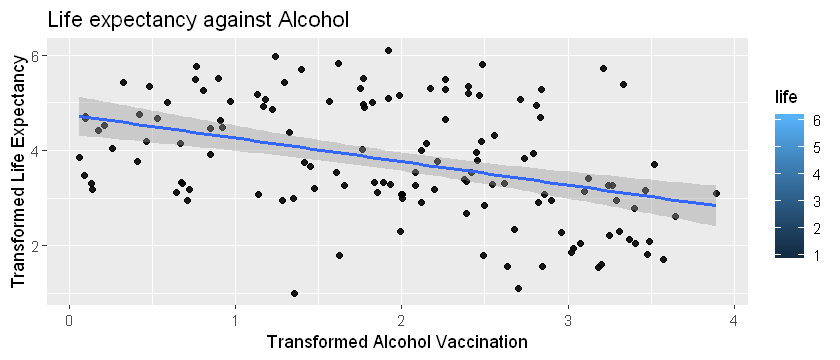

In [137]:
options(repr.plt.width = 4, repr.plot.height = 3)

# For alcohol
v <- lm(formula = life ~ ALC)
summary(v)

# Scatterplot for life expectancy at birth against alcohol
ggplot(nwho,aes(ALC,life)) + geom_point(aes(fill=life),alpha=0.9) +
  xlab("Transformed Alcohol Vaccination") + ylab("Transformed Life Expectancy") + 
  ggtitle("Life expectancy against Alcohol") + geom_smooth(method = 'lm')


In this section, we will look into whether life expectancy at birth, sqrt(life- expect) , is influenced by alcohol consumption, sqrt(ALC).

We conducted a simple linear regression test on sqrt(ALC) and sqrt(life- expect). The model results in a p-value of 1.96e-06 . This tells us that there is a statistically significant relationship between alcohol consumption and life expectancy at birth. The r-squared model is 0.1592, which tells us there is a correlation present but it may not be the most influential to the life expectancy of people at birth. However, R-squared cannot be used to justify the “goodness” of the linear regression model, so we will further look at its scatterplot From the scatterplot, we observe a downward trend. This implies that as alcohol consumption increases, life expectancy at birth decreases. Based on a study, it has shown that one more alcohol litre per capita per year is associated with a 0.142 year reduction in life expectancy. The articles further substantiate that alcohol consumption, one factor categorised as a part of a country’s health habits, has effects on life expectancy with premature mortality. (Roffia, 2022)


## 4.3 The most significant factor affecting life expectancy at birth
In Section 4.1, we have already seen that the indicators are quite strong correlated to sqrt( life-expect) . We now perform a simple linear regression analysis to determine which of the 5 indicators could be used in model sqrt( life-expect)  in a linear fashion.

**sqrt( life-expect ) = 𝛽0+ 𝛽1*X + ε**  

Where X could be any one of log(basic_water), bmi, log(measles), log(polio) or sqrt(alcohol)

The summary of the analysis is listened in the table below.

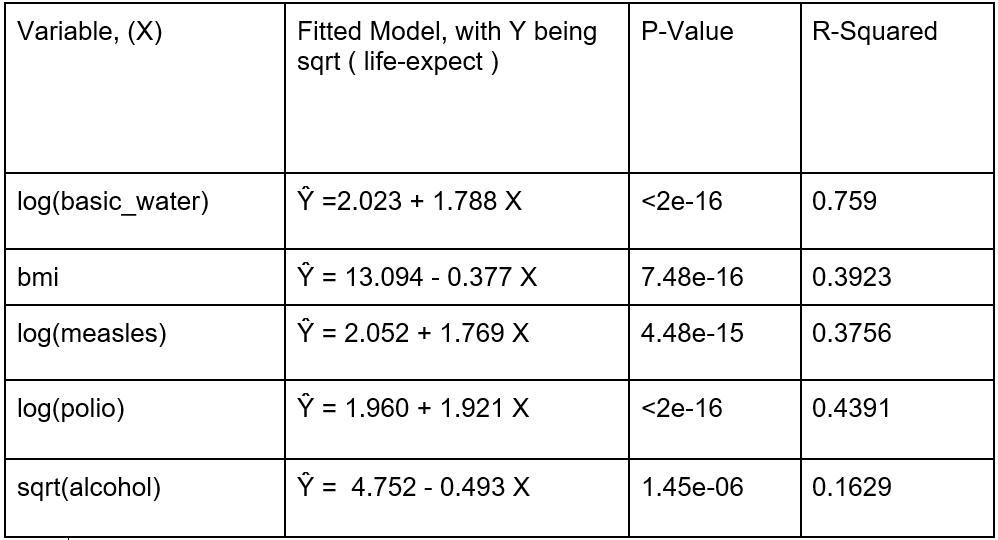

## 4.4 Multiple linear regression

In this Section, we attempt to build a multiple linear model for log(life-expect) based on the 5 given factors, namely log(basic_water), bmi,  log(measles), log(polio) or sqrt(alcohol). We use a backward elimination method to select the most appropriate model. The result is shown in the R output below.

We conclude that log(polio) and log(basic_water) are the significant measures that could be used to model log(life-expect) , whilst log(measles)  , bmi and sqrt(alcohol) are not. 

The fitted model is:

**log(life-expect) = 1.818 + 0.421 log(polio) + 1.589 log(basic-water)** 

In [145]:
# Mutiple Linear Regression
life <- sqrt(max(who$life_expect+1) - who$life_expect)
polio<- log10(max(who$polio+1) - who$polio)
measles<- log10(max(who$measles+1) - who$measles)
basicwater<-log10(max(who$basic_water+1) - who$basic_water)
bmi<- who$bmi
ALC <- sqrt(who$alcohol)
z<-lm(life~ALC)
#summary(z)

my_data <- cbind(life,bmi,ALC,measles,polio,basicwater)
my_data <- as.data.frame(my_data)

MLR =lm(life ~ polio + basicwater+ measles+bmi+ALC ,data= my_data)
step(MLR, direction="backward")


Start:  AIC=-130.89
life ~ polio + basicwater + measles + bmi + ALC

             Df Sum of Sq    RSS      AIC
- measles     1     0.007 45.430 -132.865
- bmi         1     0.165 45.588 -132.403
- ALC         1     0.310 45.733 -131.980
- polio       1     0.326 45.749 -131.935
<none>                    45.423 -130.885
- basicwater  1    40.552 85.976  -48.026

Step:  AIC=-132.87
life ~ polio + basicwater + bmi + ALC

             Df Sum of Sq    RSS      AIC
- bmi         1     0.210 45.640 -134.252
- ALC         1     0.304 45.734 -133.979
<none>                    45.430 -132.865
- polio       1     1.970 47.401 -129.218
- basicwater  1    42.560 87.990  -46.946

Step:  AIC=-134.25
life ~ polio + basicwater + ALC

             Df Sum of Sq     RSS      AIC
- ALC         1     0.262  45.902 -135.490
<none>                     45.640 -134.252
- polio       1     2.213  47.853 -129.954
- basicwater  1    56.947 102.587  -28.532

Step:  AIC=-135.49
life ~ polio + basicwater

           


Call:
lm(formula = life ~ polio + basicwater, data = my_data)

Coefficients:
(Intercept)        polio   basicwater  
     1.8183       0.4213       1.5886  


# 5 Conclusions and Discussions

# 5.1 Conclusion
Life expectancy of a country is used to gauge how effective the government's efforts in enhancing the welfare and health of the population have been. (Rice & Galbraith, 2008) With knowledge of the life expectancy of their country, governments can identify issues and follow up with actions to improve their policies. To estimate the life expectancy of a country, many factors have to be considered, such as the proportion of people with access to basic water services, the average body mass index, vaccination rates and the average level of alcohol consumption of a country. In this report, we focused on the aforementioned factors and studied their relationship with life expectancy to identify which factor is the most influential.

From our results, we conclude that:

- High BMI rates as well as large alcohol consumption decreases our life expectancy rate at birth.
- High BMI rates were found to be more detrimental to life expectancy than alcohol consumption.
- Being provided vaccinations at birth does indeed boost the life expectancy rate at birth by a significant amount. 
- Among the three positive variables, access to basic water services is the most influential for a higher life expectancy at birth.
- Having basic water services available would greatly improve the survivability of a country.

## 5.2  Limitiations

It is also important to note that there may be limitations to the representativeness of the dataset that we used as it did not specify which parts of the countries were sampled. However, even if the data were more comprehensive, recent and ongoing medical advancements make it challenging to estimate life expectancy with accuracy. For example, breakthroughs in genetics, disease prevention, and treatment could potentially have a significant impact on life expectancy trends in the following years. 

Also, there are definitely other factors in our dataset that may affect the life expectancy at birth such as domestic general government health expenditure, prevalence of HIV and GNI per capita. However, there are many gaps in knowledge for these factors. For instance, the expenditure on healthcare services does not explain the quality of healthcare in countries. Despite HIV being incurable, there are HIV treatments available to get the virus under control unlike Measles and Polio. And the GNI per capita does not show the standard of living and quality of life in a country. So, these factors cannot fully provide us with a clear conclusion unlike the variables used in section 4.2. 


Therefore, while our study provides some valuable insights, more research is needed to fully understand the complex factors that influence life expectancy.